In [49]:
import numpy
import matplotlib.pyplot as plt

In [50]:

def sigmoid(x):
    return 1 / (1 + numpy.exp(-x))   

def sigmoid_derivative(y):
    return y * (1 - y)    

In [177]:
class NeuralNetwork:
    def __init__(self, net_arch):
        numpy.random.seed(0)
        # Initialized the weights
        # initialize the weights for the biases  will add later
        self.activity = sigmoid
        self.activity_derivative = sigmoid_derivative
        self.layers = len(net_arch)
        self.steps_per_epoch = 1
        self.arch = net_arch
        self.weights = []

        # Random initialization with range of weight values (-1,1)
        for layer in range(self.layers - 1):
            w = 2*numpy.random.rand(net_arch[layer] + 1, net_arch[layer+1]) - 1
            self.weights.append(w)
    
    def _forward_prop(self, x):
        y = x
        for i in range(len(self.weights)-1):
            activation = numpy.dot(y[i], self.weights[i])
            activity = self.activity(activation)
            # add the bias for the next layer
            activity = numpy.concatenate((numpy.ones(1), numpy.array(activity)))
            y.append(activity)

        # last layer
        activation = numpy.dot(y[-1], self.weights[-1])
        activity = self.activity(activation)
        y.append(activity)
        return y
    
    def _back_prop(self, y, target, learning_rate):
        error = target - y[-1]       
        delta_vec = [error * self.activity_derivative(y[-1])]
                    
        # we need to begin from the back, from the next to last layer
        for i in range(self.layers-2, 0, -1):
            error = delta_vec[-1].dot(self.weights[i][1:].T)
            error = error*self.activity_derivative(y[i][1:])
            delta_vec.append(error)

        # Now we need to set the values from back to front
        delta_vec.reverse()
        
        # Finally, we adjust the weights, using the backpropagation rules
        for i in range(len(self.weights)):
            layer = y[i].reshape(1, self.arch[i]+1)
            delta = delta_vec[i].reshape(1, self.arch[i+1])
            self.weights[i] += learning_rate*layer.T.dot(delta)
        
    def fit(self, data, labels, learning_rate=0.1, epochs=100):
    
        # Add bias units to the input layer - 
        # add a "1" to the input data (the always-on bias neuron)
        ones = numpy.ones((1, data.shape[0]))
        Z = numpy.concatenate((ones.T, data), axis=1)
        
        for k in range(epochs):
            sample = numpy.random.randint(X.shape[0])

            # We will now go ahead and set up our feed-forward propagation:
            x = [Z[sample]]
            y = self._forward_prop(x)

            target = labels[sample]
            self._back_prop(y, target, learning_rate)

            # Now we do our back-propagation of the error to adjust the weights:
    def predict_single_data(self, x):
        val = numpy.concatenate((numpy.ones(1).T, numpy.array(x)))
        for i in range(0, len(self.weights)):
            val = self.activity(numpy.dot(val, self.weights[i]))
            val = numpy.concatenate((numpy.ones(1).T, numpy.array(val)))
        return val[1]
    
    def predict(self, X):
        Y = numpy.array([]).reshape(0, self.arch[-1])
        for x in X:
            y = numpy.array([[self.predict_single_data(x)]])
            Y = numpy.vstack((Y,y))
        return Y


Cost Function with BCE




In [178]:
def cross_entropy(predictions, targets, epsilon=1e-12):

    predictions = numpy.clip(predictions, epsilon, 1. - epsilon)
    CrossEentropy = - numpy.mean(numpy.log(predictions) * targets) 
    return CrossEentropy       

Cost Function with MSE

In [145]:
def mean_sqauer(predictions, targets,epsilon=1e-12):
    predictions = numpy.clip(predictions, epsilon, 1. - epsilon)
    meanSquare =0.5*((predictions -targets)**2) 
    return meanSquare

XOR 2dims with 2 layers and 2 hidden neurons

In [175]:
nn = NeuralNetwork([2,2,1])
X = numpy.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = numpy.array([0, 1, 1, 0])
nn.fit(X, y, epochs=100000)
print("Final prediction")
for s in X:
    print(s, nn.predict_single_data(s))

print(cross_entropy (nn.predict(X), y))

Final prediction
[0 0] 0.04294694448907893
[0 1] 0.9607456358441351
[1 0] 0.9606909583880333
[1 1] 0.0457280265873142
0.7891227208873048


XOR 3dims with 2 layers and 2 hidden neurons

In [147]:
nn2 = NeuralNetwork([3,2,1])
X = numpy.array([[0,0,0], [0,1,1], [1,0,1], [1,1,1]])
y = numpy.array([0,1,1,0])
nn2.fit(X, y, epochs=100000)
print("Final prediction")
for s in X:
    print(s, nn2.predict_single_data(s))

print("BCE is=",cross_entropy(nn2.predict(X), y))  
 


Final prediction
[0 0 0] 0.013039257797609265
[0 1 1] 0.9843579411328836
[1 0 1] 0.9843745566577017
[1 1 1] 0.016242409397549642
BCE is= 1.0614293411135756


XOR 3 with 3 layers and 4 neurons in the first hidden layer and 3 neurons in the second hidden layer

In [179]:
#will represent a 3-layer neural network, with four neurons in the first hidden layer #
#and three neurons in the second hidden layer#
nn3 = NeuralNetwork([3,4,3,1])
X = numpy.array([[0,0,0], [0,1,1], [1,0,1], [1,1,1]])
y = numpy.array([0,1,1,0])
nn3.fit(X, y, epochs=100000)
print("Final prediction")
for s in X:
    print(s, nn3.predict_single_data(s))
print(cross_entropy(nn3.predict(X), y)) 


Final prediction
[0 0 0] 0.009837906240568137
[0 1 1] 0.9883530347491546
[1 0 1] 0.9882120035819487
[1 1 1] 0.011715548643325609
1.136490511840587


Boston

In [148]:
from sklearn.datasets import load_boston
import pandas as pd
data = load_boston()
X = data.data
y = np.expand_dims(data.target,1)


In [150]:
nn5 = NeuralNetwork([13,4,3,1])
nn5.fit(X, y, epochs=100000)

In [151]:
labels=list(data.feature_names)+['target']
target=nn5.predict(X)
ds=np.concatenate((X,y),axis=1)
ds=pd.DataFrame(ds,columns=labels)
ds.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


we can also split data to train and test 

In [93]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
X,y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


'\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)\nprint(X_train.shape)\nprint(y_train.shape)\nprint(y.shape)\nprint(X.shape)\nprint(X)\n'

BCE

In [152]:
print("The amount of loss is =",cross_entropy(nn3.predict(X_test),y_test)) 

The amount of loss is = 2.700839016299564e-05


Keras

In [153]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [126]:
model = Sequential()
model.add(Dense(2,activation='sigmoid',input_shape=(3,)))
model.add(Dense(1,activation='linear'))

In [127]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [128]:
model.compile(loss='mse',optimizer='adam')

XOR 3 INPUT with keras

In [129]:
X = numpy.array([[0,0,0], [0,1,1], [1,0,1], [1,1,1]])
y = numpy.array([0,1,1,0])

In [134]:
model.fit(X,y,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0125
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0122
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0120
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 11/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 13/1000
1/1 [==============================

Prediction of XOR with 3 input by keras

In [135]:
print("Final prediction")
print( model.predict(X))


Final prediction
[[0.00222284]
 [0.9983456 ]
 [0.99810946]
 [0.00195512]]


sin predict at class with keras


In [162]:
import numpy as np
import matplotlib.pyplot as plt
import math
X = np.linspace(-2 ,2, 21)
X = np.expand_dims(X,1)
y = 1+ np.sin((np.pi/4)*X)

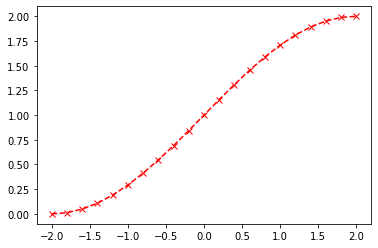

In [163]:
plt.figure()
plt.plot(X[:,0],y[:,0],'r--x')

In [164]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [165]:
model = Sequential()
model.add(Dense(5,activation='sigmoid',input_shape=(1,)))
model.add(Dense(1,activation='linear'))

In [166]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 10        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [167]:
model.compile(loss='mse',optimizer='adam')

In [171]:
model.fit(X,y,epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0185
Epoch 2/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0184
Epoch 3/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0183
Epoch 4/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 6/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 7/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0180
Epoch 8/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 9/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0178
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 11/1000
1/1 [==============================] - 0s 1ms/step - loss: 0.0177
Epoch 12/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 13/1000
1/1 [==============================

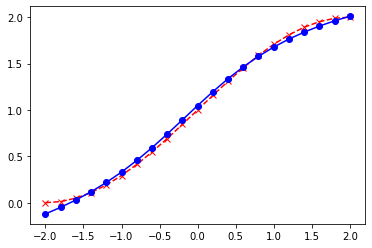

In [172]:
o = model.predict(X)
plt.figure()
plt.plot(X[:,0],y[:,0],'r--x',X[:,0], o[:,0], 'b-o')
plt.show()

loss= 0.10601747082012063


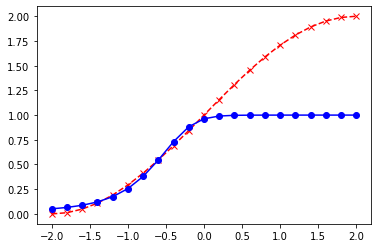

In [173]:
nn4 = NeuralNetwork([1,3,10,1])
nn4.fit(X, y, epochs=100000)
o=nn4.predict(X) 
print("loss=",cross_entropy(nn4.predict(X), y))
plt.figure()
plt.plot(X[:,0],y[:,0],'r--x',X[:,0], o[:,0], 'b-o')
plt.show()